In [36]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [37]:
train = pd.read_csv("C:/HAR/DSADS/train_set.csv", index_col=0)
test = pd.read_csv("C:/HAR/DSADS/test_set.csv", index_col=0)

In [38]:
dataset = pd.concat((train, test), ignore_index=True)

In [39]:
dataset

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,T_yacc_std,T_yacc_skew,T_zacc_mean,T_zacc_max,T_zacc_min,T_zacc_var,T_zacc_std,T_zacc_skew,T_xgyro_mean,T_xgyro_max,T_xgyro_min,T_xgyro_var,T_xgyro_std,T_xgyro_skew,T_ygyro_mean,T_ygyro_max,T_ygyro_min,T_ygyro_var,T_ygyro_std,T_ygyro_skew,T_zgyro_mean,T_zgyro_max,T_zgyro_min,T_zgyro_var,T_zgyro_std,T_zgyro_skew,T_xmag_mean,T_xmag_max,T_xmag_min,T_xmag_var,T_xmag_std,T_xmag_skew,T_ymag_mean,T_ymag_max,T_ymag_min,T_ymag_var,T_ymag_std,T_ymag_skew,T_zmag_mean,T_zmag_max,T_zmag_min,T_zmag_var,T_zmag_std,T_zmag_skew,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,RA_yacc_std,RA_yacc_skew,RA_zacc_mean,RA_zacc_max,RA_zacc_min,RA_zacc_var,RA_zacc_std,RA_zacc_skew,RA_xgyro_mean,RA_xgyro_max,RA_xgyro_min,RA_xgyro_var,RA_xgyro_std,RA_xgyro_skew,RA_ygyro_mean,RA_ygyro_max,RA_ygyro_min,RA_ygyro_var,RA_ygyro_std,RA_ygyro_skew,RA_zgyro_mean,RA_zgyro_max,RA_zgyro_min,RA_zgyro_var,RA_zgyro_std,RA_zgyro_skew,RA_xmag_mean,RA_xmag_max,RA_xmag_min,RA_xmag_var,RA_xmag_std,RA_xmag_skew,RA_ymag_mean,RA_ymag_max,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,LA_yacc_std,LA_yacc_skew,LA_zacc_mean,LA_zacc_max,LA_zacc_min,LA_zacc_var,LA_zacc_std,LA_zacc_skew,LA_xgyro_mean,LA_xgyro_max,LA_xgyro_min,LA_xgyro_var,LA_xgyro_std,LA_xgyro_skew,LA_ygyro_mean,LA_ygyro_max,LA_ygyro_min,LA_ygyro_var,LA_ygyro_std,LA_ygyro_skew,LA_zgyro_mean,LA_zgyro_max,LA_zgyro_min,LA_zgyro_var,LA_zgyro_std,LA_zgyro_skew,LA_xmag_mean,LA_xmag_max,LA_xmag_min,LA_xmag_var,LA_xmag_std,LA_xmag_skew,LA_ymag_mean,LA_ymag_max,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew,RL_xacc_mean,RL_xacc_max,RL_xacc_min,RL_xacc_var,RL_xacc_std,RL_xacc_skew,RL_yacc_mean,RL_yacc_max,RL_yacc_min,RL_yacc_var,RL_yacc_std,RL_yacc_skew,RL_zacc_mean,RL_zacc_max,RL_zacc_min,RL_zacc_var,RL_zacc_std,RL_zacc_skew,RL_xgyro_mean,RL_xgyro_max,RL_xgyro_min,RL_xgyro_var,RL_xgyro_std,RL_xgyro_skew,RL_ygyro_mean,RL_ygyro_max,RL_ygyro_min,RL_ygyro_var,RL_ygyro_std,RL_ygyro_skew,RL_zgyro_mean,RL_zgyro_max,RL_zgyro_min,RL_zgyro_var,RL_zgyro_std,RL_zgyro_skew,RL_xmag_mean,RL_xmag_max,RL_xmag_min,RL_xmag_var,RL_xmag_std,RL_xmag_skew,RL_ymag_mean,RL_ymag_max,RL_ymag_min,RL_ymag_var,RL_ymag_std,RL_ymag_skew,RL_zmag_mean,RL_zmag_max,RL_zmag_min,RL_zmag_var,RL_zmag_std,RL_zmag_skew,LL_xacc_mean,LL_xacc_max,LL_xacc_min,LL_xacc_var,LL_xacc_std,LL_xacc_skew,LL_yacc_mean,LL_yacc_max,LL_yacc_min,LL_yacc_var,LL_yacc_std,LL_yacc_skew,LL_zacc_mean,LL_zacc_max,LL_zacc_min,LL_zacc_var,LL_zacc_std,LL_zacc_skew,LL_xgyro_mean,LL_xgyro_max,LL_xgyro_min,LL_xgyro_var,LL_xgyro_std,LL_xgyro_skew,LL_ygyro_mean,LL_ygyro_max,LL_ygyro_min,LL_ygyro_var,LL_ygyro_std,LL_ygyro_skew,LL_zgyro_mean,LL_zgyro_max,LL_zgyro_min,LL_zgyro_var,LL_zgyro_std,LL_zgyro_skew,LL_xmag_mean,LL_xmag_max,LL_xmag_min,LL_xmag_var,LL_xmag_std,LL_xmag_skew,LL_ymag_mean,LL_ymag_max,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,8.809194,15.0250,4.3556,5.189205,2.277983,0.091343,-2.004678,1.0073,-5.9277,2.982022,1.726853,-0.462965,3.382556,13.7400,-3.58140,10.045948,3.169534,0.149197,0.015002,2.628500,-1.532700,0.522646,0.722942,0.630424,0.034751,1.897600,-1.238700,0.329168,0.573732,0.474335,0.016644,0.823090,-0.459980,0.040692,0.201722,0.509091,-0.712693,-0.64192,-0.79248,0.001342,0.036631,-0.192846,0.298418,0.432380,0.175400,5.264447e-03,0.072557,0.257301,-0.653500,-0.591090,-0.723980,0.001075,0.032789,-0.005042,2.351139,5.6465,0.46700,0.774687,0.880163,0.768796,9.403685,11.6300,4.9759,1.402982,1.184476,-0.772071,0.901725,3.06380,-1.8291

In [40]:
dataset.isna().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_min     0
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
Length: 271, dtype: int64

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Columns: 271 entries, T_xacc_mean to activity
dtypes: float64(270), object(1)
memory usage: 18.9+ MB


In [42]:
pd.set_option('display.max_seq_items', None)

In [43]:
dataset.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       'T_yacc_std', 'T_yacc_skew', 'T_zacc_mean', 'T_zacc_max', 'T_zacc_min',
       'T_zacc_var', 'T_zacc_std', 'T_zacc_skew', 'T_xgyro_mean',
       'T_xgyro_max', 'T_xgyro_min', 'T_xgyro_var', 'T_xgyro_std',
       'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_max', 'T_ygyro_min',
       'T_ygyro_var', 'T_ygyro_std', 'T_ygyro_skew', 'T_zgyro_mean',
       'T_zgyro_max', 'T_zgyro_min', 'T_zgyro_var', 'T_zgyro_std',
       'T_zgyro_skew', 'T_xmag_mean', 'T_xmag_max', 'T_xmag_min', 'T_xmag_var',
       'T_xmag_std', 'T_xmag_skew', 'T_ymag_mean', 'T_ymag_max', 'T_ymag_min',
       'T_ymag_var', 'T_ymag_std', 'T_ymag_skew', 'T_zmag_mean', 'T_zmag_max',
       'T_zmag_min', 'T_zmag_var', 'T_zmag_std', 'T_zmag_skew', 'RA_xacc_mean',
       'RA_xacc_max', 'RA_xacc_min', 'RA_xacc_var', 'RA_xacc_std',
       'RA_xacc_skew', 'RA_yacc_mean', 'R

In [44]:
##x,y,z dont have the same variance so we need to scale the data 
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = dataset[['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       'T_yacc_std', 'T_yacc_skew', 'T_zacc_mean', 'T_zacc_max', 'T_zacc_min',
       'T_zacc_var', 'T_zacc_std', 'T_zacc_skew', 'T_xgyro_mean',
       'T_xgyro_max', 'T_xgyro_min', 'T_xgyro_var', 'T_xgyro_std',
       'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_max', 'T_ygyro_min',
       'T_ygyro_var', 'T_ygyro_std', 'T_ygyro_skew', 'T_zgyro_mean',
       'T_zgyro_max', 'T_zgyro_min', 'T_zgyro_var', 'T_zgyro_std',
       'T_zgyro_skew', 'T_xmag_mean', 'T_xmag_max', 'T_xmag_min', 'T_xmag_var',
       'T_xmag_std', 'T_xmag_skew', 'T_ymag_mean', 'T_ymag_max', 'T_ymag_min',
       'T_ymag_var', 'T_ymag_std', 'T_ymag_skew', 'T_zmag_mean', 'T_zmag_max',
       'T_zmag_min', 'T_zmag_var', 'T_zmag_std', 'T_zmag_skew', 'RA_xacc_mean',
       'RA_xacc_max', 'RA_xacc_min', 'RA_xacc_var', 'RA_xacc_std',
       'RA_xacc_skew', 'RA_yacc_mean', 'RA_yacc_max', 'RA_yacc_min',
       'RA_yacc_var', 'RA_yacc_std', 'RA_yacc_skew', 'RA_zacc_mean',
       'RA_zacc_max', 'RA_zacc_min', 'RA_zacc_var', 'RA_zacc_std',
       'RA_zacc_skew', 'RA_xgyro_mean', 'RA_xgyro_max', 'RA_xgyro_min',
       'RA_xgyro_var', 'RA_xgyro_std', 'RA_xgyro_skew', 'RA_ygyro_mean',
       'RA_ygyro_max', 'RA_ygyro_min', 'RA_ygyro_var', 'RA_ygyro_std',
       'RA_ygyro_skew', 'RA_zgyro_mean', 'RA_zgyro_max', 'RA_zgyro_min',
       'RA_zgyro_var', 'RA_zgyro_std', 'RA_zgyro_skew', 'RA_xmag_mean',
       'RA_xmag_max', 'RA_xmag_min', 'RA_xmag_var', 'RA_xmag_std',
       'RA_xmag_skew', 'RA_ymag_mean', 'RA_ymag_max', 'RA_ymag_min',
       'RA_ymag_var', 'RA_ymag_std', 'RA_ymag_skew', 'RA_zmag_mean',
       'RA_zmag_max', 'RA_zmag_min', 'RA_zmag_var', 'RA_zmag_std',
       'RA_zmag_skew', 'LA_xacc_mean', 'LA_xacc_max', 'LA_xacc_min',
       'LA_xacc_var', 'LA_xacc_std', 'LA_xacc_skew', 'LA_yacc_mean',
       'LA_yacc_max', 'LA_yacc_min', 'LA_yacc_var', 'LA_yacc_std',
       'LA_yacc_skew', 'LA_zacc_mean', 'LA_zacc_max', 'LA_zacc_min',
       'LA_zacc_var', 'LA_zacc_std', 'LA_zacc_skew', 'LA_xgyro_mean',
       'LA_xgyro_max', 'LA_xgyro_min', 'LA_xgyro_var', 'LA_xgyro_std',
       'LA_xgyro_skew', 'LA_ygyro_mean', 'LA_ygyro_max', 'LA_ygyro_min',
       'LA_ygyro_var', 'LA_ygyro_std', 'LA_ygyro_skew', 'LA_zgyro_mean',
       'LA_zgyro_max', 'LA_zgyro_min', 'LA_zgyro_var', 'LA_zgyro_std',
       'LA_zgyro_skew', 'LA_xmag_mean', 'LA_xmag_max', 'LA_xmag_min',
       'LA_xmag_var', 'LA_xmag_std', 'LA_xmag_skew', 'LA_ymag_mean',
       'LA_ymag_max', 'LA_ymag_min', 'LA_ymag_var', 'LA_ymag_std',
       'LA_ymag_skew', 'LA_zmag_mean', 'LA_zmag_max', 'LA_zmag_min',
       'LA_zmag_var', 'LA_zmag_std', 'LA_zmag_skew', 'RL_xacc_mean',
       'RL_xacc_max', 'RL_xacc_min', 'RL_xacc_var', 'RL_xacc_std',
       'RL_xacc_skew', 'RL_yacc_mean', 'RL_yacc_max', 'RL_yacc_min',
       'RL_yacc_var', 'RL_yacc_std', 'RL_yacc_skew', 'RL_zacc_mean',
       'RL_zacc_max', 'RL_zacc_min', 'RL_zacc_var', 'RL_zacc_std',
       'RL_zacc_skew', 'RL_xgyro_mean', 'RL_xgyro_max', 'RL_xgyro_min',
       'RL_xgyro_var', 'RL_xgyro_std', 'RL_xgyro_skew', 'RL_ygyro_mean',
       'RL_ygyro_max', 'RL_ygyro_min', 'RL_ygyro_var', 'RL_ygyro_std',
       'RL_ygyro_skew', 'RL_zgyro_mean', 'RL_zgyro_max', 'RL_zgyro_min',
       'RL_zgyro_var', 'RL_zgyro_std', 'RL_zgyro_skew', 'RL_xmag_mean',
       'RL_xmag_max', 'RL_xmag_min', 'RL_xmag_var', 'RL_xmag_std',
       'RL_xmag_skew', 'RL_ymag_mean', 'RL_ymag_max', 'RL_ymag_min',
       'RL_ymag_var', 'RL_ymag_std', 'RL_ymag_skew', 'RL_zmag_mean',
       'RL_zmag_max', 'RL_zmag_min', 'RL_zmag_var', 'RL_zmag_std',
       'RL_zmag_skew', 'LL_xacc_mean', 'LL_xacc_max', 'LL_xacc_min',
       'LL_xacc_var', 'LL_xacc_std', 'LL_xacc_skew', 'LL_yacc_mean',
       'LL_yacc_max', 'LL_yacc_min', 'LL_yacc_var', 'LL_yacc_std',
       'LL_yacc_skew', 'LL_zacc_mean', 'LL_zacc_max', 'LL_zacc_min',
       'LL_zacc_var', 'LL_zacc_std', 'LL_zacc_skew', 'LL_xgyro_mean',
       'LL_xgyro_max', 'LL_xgyro_min', 'LL_xgyro_var', 'LL_xgyro_std',
       'LL_xgyro_skew', 'LL_ygyro_mean', 'LL_ygyro_max', 'LL_ygyro_min',
       'LL_ygyro_var', 'LL_ygyro_std', 'LL_ygyro_skew', 'LL_zgyro_mean',
       'LL_zgyro_max', 'LL_zgyro_min', 'LL_zgyro_var', 'LL_zgyro_std',
       'LL_zgyro_skew', 'LL_xmag_mean', 'LL_xmag_max', 'LL_xmag_min',
       'LL_xmag_var', 'LL_xmag_std', 'LL_xmag_skew', 'LL_ymag_mean',
       'LL_ymag_max', 'LL_ymag_min', 'LL_ymag_var', 'LL_ymag_std',
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew']]
y= dataset['activity']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       'T_yacc_std', 'T_yacc_skew', 'T_zacc_mean', 'T_zacc_max', 'T_zacc_min',
       'T_zacc_var', 'T_zacc_std', 'T_zacc_skew', 'T_xgyro_mean',
       'T_xgyro_max', 'T_xgyro_min', 'T_xgyro_var', 'T_xgyro_std',
       'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_max', 'T_ygyro_min',
       'T_ygyro_var', 'T_ygyro_std', 'T_ygyro_skew', 'T_zgyro_mean',
       'T_zgyro_max', 'T_zgyro_min', 'T_zgyro_var', 'T_zgyro_std',
       'T_zgyro_skew', 'T_xmag_mean', 'T_xmag_max', 'T_xmag_min', 'T_xmag_var',
       'T_xmag_std', 'T_xmag_skew', 'T_ymag_mean', 'T_ymag_max', 'T_ymag_min',
       'T_ymag_var', 'T_ymag_std', 'T_ymag_skew', 'T_zmag_mean', 'T_zmag_max',
       'T_zmag_min', 'T_zmag_var', 'T_zmag_std', 'T_zmag_skew', 'RA_xacc_mean',
       'RA_xacc_max', 'RA_xacc_min', 'RA_xacc_var', 'RA_xacc_std',
       'RA_xacc_skew', 'RA_yacc_mean', 'RA_yacc_max', 'RA_yacc_min',
       'RA_yacc_var', 'RA_yacc_std', 'RA_yacc_skew', 'RA_zacc_mean',
       'RA_zacc_max', 'RA_zacc_min', 'RA_zacc_var', 'RA_zacc_std',
       'RA_zacc_skew', 'RA_xgyro_mean', 'RA_xgyro_max', 'RA_xgyro_min',
       'RA_xgyro_var', 'RA_xgyro_std', 'RA_xgyro_skew', 'RA_ygyro_mean',
       'RA_ygyro_max', 'RA_ygyro_min', 'RA_ygyro_var', 'RA_ygyro_std',
       'RA_ygyro_skew', 'RA_zgyro_mean', 'RA_zgyro_max', 'RA_zgyro_min',
       'RA_zgyro_var', 'RA_zgyro_std', 'RA_zgyro_skew', 'RA_xmag_mean',
       'RA_xmag_max', 'RA_xmag_min', 'RA_xmag_var', 'RA_xmag_std',
       'RA_xmag_skew', 'RA_ymag_mean', 'RA_ymag_max', 'RA_ymag_min',
       'RA_ymag_var', 'RA_ymag_std', 'RA_ymag_skew', 'RA_zmag_mean',
       'RA_zmag_max', 'RA_zmag_min', 'RA_zmag_var', 'RA_zmag_std',
       'RA_zmag_skew', 'LA_xacc_mean', 'LA_xacc_max', 'LA_xacc_min',
       'LA_xacc_var', 'LA_xacc_std', 'LA_xacc_skew', 'LA_yacc_mean',
       'LA_yacc_max', 'LA_yacc_min', 'LA_yacc_var', 'LA_yacc_std',
       'LA_yacc_skew', 'LA_zacc_mean', 'LA_zacc_max', 'LA_zacc_min',
       'LA_zacc_var', 'LA_zacc_std', 'LA_zacc_skew', 'LA_xgyro_mean',
       'LA_xgyro_max', 'LA_xgyro_min', 'LA_xgyro_var', 'LA_xgyro_std',
       'LA_xgyro_skew', 'LA_ygyro_mean', 'LA_ygyro_max', 'LA_ygyro_min',
       'LA_ygyro_var', 'LA_ygyro_std', 'LA_ygyro_skew', 'LA_zgyro_mean',
       'LA_zgyro_max', 'LA_zgyro_min', 'LA_zgyro_var', 'LA_zgyro_std',
       'LA_zgyro_skew', 'LA_xmag_mean', 'LA_xmag_max', 'LA_xmag_min',
       'LA_xmag_var', 'LA_xmag_std', 'LA_xmag_skew', 'LA_ymag_mean',
       'LA_ymag_max', 'LA_ymag_min', 'LA_ymag_var', 'LA_ymag_std',
       'LA_ymag_skew', 'LA_zmag_mean', 'LA_zmag_max', 'LA_zmag_min',
       'LA_zmag_var', 'LA_zmag_std', 'LA_zmag_skew', 'RL_xacc_mean',
       'RL_xacc_max', 'RL_xacc_min', 'RL_xacc_var', 'RL_xacc_std',
       'RL_xacc_skew', 'RL_yacc_mean', 'RL_yacc_max', 'RL_yacc_min',
       'RL_yacc_var', 'RL_yacc_std', 'RL_yacc_skew', 'RL_zacc_mean',
       'RL_zacc_max', 'RL_zacc_min', 'RL_zacc_var', 'RL_zacc_std',
       'RL_zacc_skew', 'RL_xgyro_mean', 'RL_xgyro_max', 'RL_xgyro_min',
       'RL_xgyro_var', 'RL_xgyro_std', 'RL_xgyro_skew', 'RL_ygyro_mean',
       'RL_ygyro_max', 'RL_ygyro_min', 'RL_ygyro_var', 'RL_ygyro_std',
       'RL_ygyro_skew', 'RL_zgyro_mean', 'RL_zgyro_max', 'RL_zgyro_min',
       'RL_zgyro_var', 'RL_zgyro_std', 'RL_zgyro_skew', 'RL_xmag_mean',
       'RL_xmag_max', 'RL_xmag_min', 'RL_xmag_var', 'RL_xmag_std',
       'RL_xmag_skew', 'RL_ymag_mean', 'RL_ymag_max', 'RL_ymag_min',
       'RL_ymag_var', 'RL_ymag_std', 'RL_ymag_skew', 'RL_zmag_mean',
       'RL_zmag_max', 'RL_zmag_min', 'RL_zmag_var', 'RL_zmag_std',
       'RL_zmag_skew', 'LL_xacc_mean', 'LL_xacc_max', 'LL_xacc_min',
       'LL_xacc_var', 'LL_xacc_std', 'LL_xacc_skew', 'LL_yacc_mean',
       'LL_yacc_max', 'LL_yacc_min', 'LL_yacc_var', 'LL_yacc_std',
       'LL_yacc_skew', 'LL_zacc_mean', 'LL_zacc_max', 'LL_zacc_min',
       'LL_zacc_var', 'LL_zacc_std', 'LL_zacc_skew', 'LL_xgyro_mean',
       'LL_xgyro_max', 'LL_xgyro_min', 'LL_xgyro_var', 'LL_xgyro_std',
       'LL_xgyro_skew', 'LL_ygyro_mean', 'LL_ygyro_max', 'LL_ygyro_min',
       'LL_ygyro_var', 'LL_ygyro_std', 'LL_ygyro_skew', 'LL_zgyro_mean',
       'LL_zgyro_max', 'LL_zgyro_min', 'LL_zgyro_var', 'LL_zgyro_std',
       'LL_zgyro_skew', 'LL_xmag_mean', 'LL_xmag_max', 'LL_xmag_min',
       'LL_xmag_var', 'LL_xmag_std', 'LL_xmag_skew', 'LL_ymag_mean',
       'LL_ymag_max', 'LL_ymag_min', 'LL_ymag_var', 'LL_ymag_std',
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew'])
scaled_X['label'] = y.values

scaled_X
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       'T_yacc_std', 'T_yacc_skew', 'T_zacc_mean', 'T_zacc_max', 'T_zacc_min',
       'T_zacc_var', 'T_zacc_std', 'T_zacc_skew', 'T_xgyro_mean',
       'T_xgyro_max', 'T_xgyro_min', 'T_xgyro_var', 'T_xgyro_std',
       'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_max', 'T_ygyro_min',
       'T_ygyro_var', 'T_ygyro_std', 'T_ygyro_skew', 'T_zgyro_mean',
       'T_zgyro_max', 'T_zgyro_min', 'T_zgyro_var', 'T_zgyro_std',
       'T_zgyro_skew', 'T_xmag_mean', 'T_xmag_max', 'T_xmag_min', 'T_xmag_var',
       'T_xmag_std', 'T_xmag_skew', 'T_ymag_mean', 'T_ymag_max', 'T_ymag_min',
       'T_ymag_var', 'T_ymag_std', 'T_ymag_skew', 'T_zmag_mean', 'T_zmag_max',
       'T_zmag_min', 'T_zmag_var', 'T_zmag_std', 'T_zmag_skew', 'RA_xacc_mean',
       'RA_xacc_max', 'RA_xacc_min', 'RA_xacc_var', 'RA_xacc_std',
       'RA_xacc_skew', 'RA_yacc_mean', 'RA_yacc_max', 'RA_yacc_min',
       'RA_yacc_var', 'RA_yacc_std', 'RA_yacc_skew', 'RA_zacc_mean',
       'RA_zacc_max', 'RA_zacc_min', 'RA_zacc_var', 'RA_zacc_std',
       'RA_zacc_skew', 'RA_xgyro_mean', 'RA_xgyro_max', 'RA_xgyro_min',
       'RA_xgyro_var', 'RA_xgyro_std', 'RA_xgyro_skew', 'RA_ygyro_mean',
       'RA_ygyro_max', 'RA_ygyro_min', 'RA_ygyro_var', 'RA_ygyro_std',
       'RA_ygyro_skew', 'RA_zgyro_mean', 'RA_zgyro_max', 'RA_zgyro_min',
       'RA_zgyro_var', 'RA_zgyro_std', 'RA_zgyro_skew', 'RA_xmag_mean',
       'RA_xmag_max', 'RA_xmag_min', 'RA_xmag_var', 'RA_xmag_std',
       'RA_xmag_skew', 'RA_ymag_mean', 'RA_ymag_max', 'RA_ymag_min',
       'RA_ymag_var', 'RA_ymag_std', 'RA_ymag_skew', 'RA_zmag_mean',
       'RA_zmag_max', 'RA_zmag_min', 'RA_zmag_var', 'RA_zmag_std',
       'RA_zmag_skew', 'LA_xacc_mean', 'LA_xacc_max', 'LA_xacc_min',
       'LA_xacc_var', 'LA_xacc_std', 'LA_xacc_skew', 'LA_yacc_mean',
       'LA_yacc_max', 'LA_yacc_min', 'LA_yacc_var', 'LA_yacc_std',
       'LA_yacc_skew', 'LA_zacc_mean', 'LA_zacc_max', 'LA_zacc_min',
       'LA_zacc_var', 'LA_zacc_std', 'LA_zacc_skew', 'LA_xgyro_mean',
       'LA_xgyro_max', 'LA_xgyro_min', 'LA_xgyro_var', 'LA_xgyro_std',
       'LA_xgyro_skew', 'LA_ygyro_mean', 'LA_ygyro_max', 'LA_ygyro_min',
       'LA_ygyro_var', 'LA_ygyro_std', 'LA_ygyro_skew', 'LA_zgyro_mean',
       'LA_zgyro_max', 'LA_zgyro_min', 'LA_zgyro_var', 'LA_zgyro_std',
       'LA_zgyro_skew', 'LA_xmag_mean', 'LA_xmag_max', 'LA_xmag_min',
       'LA_xmag_var', 'LA_xmag_std', 'LA_xmag_skew', 'LA_ymag_mean',
       'LA_ymag_max', 'LA_ymag_min', 'LA_ymag_var', 'LA_ymag_std',
       'LA_ymag_skew', 'LA_zmag_mean', 'LA_zmag_max', 'LA_zmag_min',
       'LA_zmag_var', 'LA_zmag_std', 'LA_zmag_skew', 'RL_xacc_mean',
       'RL_xacc_max', 'RL_xacc_min', 'RL_xacc_var', 'RL_xacc_std',
       'RL_xacc_skew', 'RL_yacc_mean', 'RL_yacc_max', 'RL_yacc_min',
       'RL_yacc_var', 'RL_yacc_std', 'RL_yacc_skew', 'RL_zacc_mean',
       'RL_zacc_max', 'RL_zacc_min', 'RL_zacc_var', 'RL_zacc_std',
       'RL_zacc_skew', 'RL_xgyro_mean', 'RL_xgyro_max', 'RL_xgyro_min',
       'RL_xgyro_var', 'RL_xgyro_std', 'RL_xgyro_skew', 'RL_ygyro_mean',
       'RL_ygyro_max', 'RL_ygyro_min', 'RL_ygyro_var', 'RL_ygyro_std',
       'RL_ygyro_skew', 'RL_zgyro_mean', 'RL_zgyro_max', 'RL_zgyro_min',
       'RL_zgyro_var', 'RL_zgyro_std', 'RL_zgyro_skew', 'RL_xmag_mean',
       'RL_xmag_max', 'RL_xmag_min', 'RL_xmag_var', 'RL_xmag_std',
       'RL_xmag_skew', 'RL_ymag_mean', 'RL_ymag_max', 'RL_ymag_min',
       'RL_ymag_var', 'RL_ymag_std', 'RL_ymag_skew', 'RL_zmag_mean',
       'RL_zmag_max', 'RL_zmag_min', 'RL_zmag_var', 'RL_zmag_std',
       'RL_zmag_skew', 'LL_xacc_mean', 'LL_xacc_max', 'LL_xacc_min',
       'LL_xacc_var', 'LL_xacc_std', 'LL_xacc_skew', 'LL_yacc_mean',
       'LL_yacc_max', 'LL_yacc_min', 'LL_yacc_var', 'LL_yacc_std',
       'LL_yacc_skew', 'LL_zacc_mean', 'LL_zacc_max', 'LL_zacc_min',
       'LL_zacc_var', 'LL_zacc_std', 'LL_zacc_skew', 'LL_xgyro_mean',
       'LL_xgyro_max', 'LL_xgyro_min', 'LL_xgyro_var', 'LL_xgyro_std',
       'LL_xgyro_skew', 'LL_ygyro_mean', 'LL_ygyro_max', 'LL_ygyro_min',
       'LL_ygyro_var', 'LL_ygyro_std', 'LL_ygyro_skew', 'LL_zgyro_mean',
       'LL_zgyro_max', 'LL_zgyro_min', 'LL_zgyro_var', 'LL_zgyro_std',
       'LL_zgyro_skew', 'LL_xmag_mean', 'LL_xmag_max', 'LL_xmag_min',
       'LL_xmag_var', 'LL_xmag_std', 'LL_xmag_skew', 'LL_ymag_mean',
       'LL_ymag_max', 'LL_ymag_min', 'LL_ymag_var', 'LL_ymag_std',
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew'])
scaled_X['label'] = y.values

scaled_X.head(10)

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,T_yacc_std,T_yacc_skew,T_zacc_mean,T_zacc_max,T_zacc_min,T_zacc_var,T_zacc_std,T_zacc_skew,T_xgyro_mean,T_xgyro_max,T_xgyro_min,T_xgyro_var,T_xgyro_std,T_xgyro_skew,T_ygyro_mean,T_ygyro_max,T_ygyro_min,T_ygyro_var,T_ygyro_std,T_ygyro_skew,T_zgyro_mean,T_zgyro_max,T_zgyro_min,T_zgyro_var,T_zgyro_std,T_zgyro_skew,T_xmag_mean,T_xmag_max,T_xmag_min,T_xmag_var,T_xmag_std,T_xmag_skew,T_ymag_mean,T_ymag_max,T_ymag_min,T_ymag_var,T_ymag_std,T_ymag_skew,T_zmag_mean,T_zmag_max,T_zmag_min,T_zmag_var,T_zmag_std,T_zmag_skew,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,RA_yacc_std,RA_yacc_skew,RA_zacc_mean,RA_zacc_max,RA_zacc_min,RA_zacc_var,RA_zacc_std,RA_zacc_skew,RA_xgyro_mean,RA_xgyro_max,RA_xgyro_min,RA_xgyro_var,RA_xgyro_std,RA_xgyro_skew,RA_ygyro_mean,RA_ygyro_max,RA_ygyro_min,RA_ygyro_var,RA_ygyro_std,RA_ygyro_skew,RA_zgyro_mean,RA_zgyro_max,RA_zgyro_min,RA_zgyro_var,RA_zgyro_std,RA_zgyro_skew,RA_xmag_mean,RA_xmag_max,RA_xmag_min,RA_xmag_var,RA_xmag_std,RA_xmag_skew,RA_ymag_mean,RA_ymag_max,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,LA_yacc_std,LA_yacc_skew,LA_zacc_mean,LA_zacc_max,LA_zacc_min,LA_zacc_var,LA_zacc_std,LA_zacc_skew,LA_xgyro_mean,LA_xgyro_max,LA_xgyro_min,LA_xgyro_var,LA_xgyro_std,LA_xgyro_skew,LA_ygyro_mean,LA_ygyro_max,LA_ygyro_min,LA_ygyro_var,LA_ygyro_std,LA_ygyro_skew,LA_zgyro_mean,LA_zgyro_max,LA_zgyro_min,LA_zgyro_var,LA_zgyro_std,LA_zgyro_skew,LA_xmag_mean,LA_xmag_max,LA_xmag_min,LA_xmag_var,LA_xmag_std,LA_xmag_skew,LA_ymag_mean,LA_ymag_max,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew,RL_xacc_mean,RL_xacc_max,RL_xacc_min,RL_xacc_var,RL_xacc_std,RL_xacc_skew,RL_yacc_mean,RL_yacc_max,RL_yacc_min,RL_yacc_var,RL_yacc_std,RL_yacc_skew,RL_zacc_mean,RL_zacc_max,RL_zacc_min,RL_zacc_var,RL_zacc_std,RL_zacc_skew,RL_xgyro_mean,RL_xgyro_max,RL_xgyro_min,RL_xgyro_var,RL_xgyro_std,RL_xgyro_skew,RL_ygyro_mean,RL_ygyro_max,RL_ygyro_min,RL_ygyro_var,RL_ygyro_std,RL_ygyro_skew,RL_zgyro_mean,RL_zgyro_max,RL_zgyro_min,RL_zgyro_var,RL_zgyro_std,RL_zgyro_skew,RL_xmag_mean,RL_xmag_max,RL_xmag_min,RL_xmag_var,RL_xmag_std,RL_xmag_skew,RL_ymag_mean,RL_ymag_max,RL_ymag_min,RL_ymag_var,RL_ymag_std,RL_ymag_skew,RL_zmag_mean,RL_zmag_max,RL_zmag_min,RL_zmag_var,RL_zmag_std,RL_zmag_skew,LL_xacc_mean,LL_xacc_max,LL_xacc_min,LL_xacc_var,LL_xacc_std,LL_xacc_skew,LL_yacc_mean,LL_yacc_max,LL_yacc_min,LL_yacc_var,LL_yacc_std,LL_yacc_skew,LL_zacc_mean,LL_zacc_max,LL_zacc_min,LL_zacc_var,LL_zacc_std,LL_zacc_skew,LL_xgyro_mean,LL_xgyro_max,LL_xgyro_min,LL_xgyro_var,LL_xgyro_std,LL_xgyro_skew,LL_ygyro_mean,LL_ygyro_max,LL_ygyro_min,LL_ygyro_var,LL_ygyro_std,LL_ygyro_skew,LL_zgyro_mean,LL_zgyro_max,LL_zgyro_min,LL_zgyro_var,LL_zgyro_std,LL_zgyro_skew,LL_xmag_mean,LL_xmag_max,LL_xmag_min,LL_xmag_var,LL_xmag_std,LL_xmag_skew,LL_ymag_mean,LL_ymag_max,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,label
0,0.277669,0.033788,0.133859,-0.279240,-0.051361,-0.278848,-0.542177,-0.190222,-0.558336,0.238527,0.700990,-0.573217,0.249828,0.554668,-0.507800,0.168714,0.798917,0.088827,0.174837,0.671627,-0.043905,-0.061844,0.362618,1.031826,0.499497,0.603367,0.005885,-0.089758,0.298063,0.714173,0.634319,0.308025,0.177052,-0.208252,-0.088870,0.878643,-0.328037,-0.365732,-0.358035,-0.254709,-0.098208,-0.604222,0.718154,0.803020,0.623666,-0.110903,0.242531,0.484217,-1.050594,-1.128821,-0.942890,-0.284825,-0.311835,-0.131043,-0.437517,-0.449530,0.128714,-0.404803,-0.508053,0.740846,1.342831,0.203626,0.672850,-0.301673,-0.225971,-1.00447

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [46]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [47]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6840, 271) (2280, 271)
(6840,) (2280,)


In [48]:
unique, counts = np.unique(y_train, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T) 

Train data label statistics::
[['ascendingStairs' 364]
 ['basketBall' 358]
 ['crossTrainer' 355]
 ['cyclingHorizontal' 342]
 ['cyclingVertical' 361]
 ['decendingStairs' 371]
 ['jumping' 347]
 ['lyingBack' 372]
 ['lyingRigh' 371]
 ['movingInElevator' 365]
 ['rowing' 349]
 ['runningTreadmill' 365]
 ['sitting' 365]
 ['standing' 374]
 ['standingInElevatorStill' 359]
 ['stepper' 367]
 ['walkingLot' 349]
 ['walkingTreadmillFlat' 357]
 ['walkingTreadmillIncline' 349]]
Test data label statistics::
[['ascendingStairs' 116]
 ['basketBall' 122]
 ['crossTrainer' 125]
 ['cyclingHorizontal' 138]
 ['cyclingVertical' 119]
 ['decendingStairs' 109]
 ['jumping' 133]
 ['lyingBack' 108]
 ['lyingRigh' 109]
 ['movingInElevator' 115]
 ['rowing' 131]
 ['runningTreadmill' 115]
 ['sitting' 115]
 ['standing' 106]
 ['standingInElevatorStill' 121]
 ['stepper' 113]
 ['walkingLot' 131]
 ['walkingTreadmillFlat' 123]
 ['walkingTreadmillIncline' 131]]


In [49]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train, y_train = create_dataset(X_train[['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       'T_yacc_std', 'T_yacc_skew', 'T_zacc_mean', 'T_zacc_max', 'T_zacc_min',
       'T_zacc_var', 'T_zacc_std', 'T_zacc_skew', 'T_xgyro_mean',
       'T_xgyro_max', 'T_xgyro_min', 'T_xgyro_var', 'T_xgyro_std',
       'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_max', 'T_ygyro_min',
       'T_ygyro_var', 'T_ygyro_std', 'T_ygyro_skew', 'T_zgyro_mean',
       'T_zgyro_max', 'T_zgyro_min', 'T_zgyro_var', 'T_zgyro_std',
       'T_zgyro_skew', 'T_xmag_mean', 'T_xmag_max', 'T_xmag_min', 'T_xmag_var',
       'T_xmag_std', 'T_xmag_skew', 'T_ymag_mean', 'T_ymag_max', 'T_ymag_min',
       'T_ymag_var', 'T_ymag_std', 'T_ymag_skew', 'T_zmag_mean', 'T_zmag_max',
       'T_zmag_min', 'T_zmag_var', 'T_zmag_std', 'T_zmag_skew', 'RA_xacc_mean',
       'RA_xacc_max', 'RA_xacc_min', 'RA_xacc_var', 'RA_xacc_std',
       'RA_xacc_skew', 'RA_yacc_mean', 'RA_yacc_max', 'RA_yacc_min',
       'RA_yacc_var', 'RA_yacc_std', 'RA_yacc_skew', 'RA_zacc_mean',
       'RA_zacc_max', 'RA_zacc_min', 'RA_zacc_var', 'RA_zacc_std',
       'RA_zacc_skew', 'RA_xgyro_mean', 'RA_xgyro_max', 'RA_xgyro_min',
       'RA_xgyro_var', 'RA_xgyro_std', 'RA_xgyro_skew', 'RA_ygyro_mean',
       'RA_ygyro_max', 'RA_ygyro_min', 'RA_ygyro_var', 'RA_ygyro_std',
       'RA_ygyro_skew', 'RA_zgyro_mean', 'RA_zgyro_max', 'RA_zgyro_min',
       'RA_zgyro_var', 'RA_zgyro_std', 'RA_zgyro_skew', 'RA_xmag_mean',
       'RA_xmag_max', 'RA_xmag_min', 'RA_xmag_var', 'RA_xmag_std',
       'RA_xmag_skew', 'RA_ymag_mean', 'RA_ymag_max', 'RA_ymag_min',
       'RA_ymag_var', 'RA_ymag_std', 'RA_ymag_skew', 'RA_zmag_mean',
       'RA_zmag_max', 'RA_zmag_min', 'RA_zmag_var', 'RA_zmag_std',
       'RA_zmag_skew', 'LA_xacc_mean', 'LA_xacc_max', 'LA_xacc_min',
       'LA_xacc_var', 'LA_xacc_std', 'LA_xacc_skew', 'LA_yacc_mean',
       'LA_yacc_max', 'LA_yacc_min', 'LA_yacc_var', 'LA_yacc_std',
       'LA_yacc_skew', 'LA_zacc_mean', 'LA_zacc_max', 'LA_zacc_min',
       'LA_zacc_var', 'LA_zacc_std', 'LA_zacc_skew', 'LA_xgyro_mean',
       'LA_xgyro_max', 'LA_xgyro_min', 'LA_xgyro_var', 'LA_xgyro_std',
       'LA_xgyro_skew', 'LA_ygyro_mean', 'LA_ygyro_max', 'LA_ygyro_min',
       'LA_ygyro_var', 'LA_ygyro_std', 'LA_ygyro_skew', 'LA_zgyro_mean',
       'LA_zgyro_max', 'LA_zgyro_min', 'LA_zgyro_var', 'LA_zgyro_std',
       'LA_zgyro_skew', 'LA_xmag_mean', 'LA_xmag_max', 'LA_xmag_min',
       'LA_xmag_var', 'LA_xmag_std', 'LA_xmag_skew', 'LA_ymag_mean',
       'LA_ymag_max', 'LA_ymag_min', 'LA_ymag_var', 'LA_ymag_std',
       'LA_ymag_skew', 'LA_zmag_mean', 'LA_zmag_max', 'LA_zmag_min',
       'LA_zmag_var', 'LA_zmag_std', 'LA_zmag_skew', 'RL_xacc_mean',
       'RL_xacc_max', 'RL_xacc_min', 'RL_xacc_var', 'RL_xacc_std',
       'RL_xacc_skew', 'RL_yacc_mean', 'RL_yacc_max', 'RL_yacc_min',
       'RL_yacc_var', 'RL_yacc_std', 'RL_yacc_skew', 'RL_zacc_mean',
       'RL_zacc_max', 'RL_zacc_min', 'RL_zacc_var', 'RL_zacc_std',
       'RL_zacc_skew', 'RL_xgyro_mean', 'RL_xgyro_max', 'RL_xgyro_min',
       'RL_xgyro_var', 'RL_xgyro_std', 'RL_xgyro_skew', 'RL_ygyro_mean',
       'RL_ygyro_max', 'RL_ygyro_min', 'RL_ygyro_var', 'RL_ygyro_std',
       'RL_ygyro_skew', 'RL_zgyro_mean', 'RL_zgyro_max', 'RL_zgyro_min',
       'RL_zgyro_var', 'RL_zgyro_std', 'RL_zgyro_skew', 'RL_xmag_mean',
       'RL_xmag_max', 'RL_xmag_min', 'RL_xmag_var', 'RL_xmag_std',
       'RL_xmag_skew', 'RL_ymag_mean', 'RL_ymag_max', 'RL_ymag_min',
       'RL_ymag_var', 'RL_ymag_std', 'RL_ymag_skew', 'RL_zmag_mean',
       'RL_zmag_max', 'RL_zmag_min', 'RL_zmag_var', 'RL_zmag_std',
       'RL_zmag_skew', 'LL_xacc_mean', 'LL_xacc_max', 'LL_xacc_min',
       'LL_xacc_var', 'LL_xacc_std', 'LL_xacc_skew', 'LL_yacc_mean',
       'LL_yacc_max', 'LL_yacc_min', 'LL_yacc_var', 'LL_yacc_std',
       'LL_yacc_skew', 'LL_zacc_mean', 'LL_zacc_max', 'LL_zacc_min',
       'LL_zacc_var', 'LL_zacc_std', 'LL_zacc_skew', 'LL_xgyro_mean',
       'LL_xgyro_max', 'LL_xgyro_min', 'LL_xgyro_var', 'LL_xgyro_std',
       'LL_xgyro_skew', 'LL_ygyro_mean', 'LL_ygyro_max', 'LL_ygyro_min',
       'LL_ygyro_var', 'LL_ygyro_std', 'LL_ygyro_skew', 'LL_zgyro_mean',
       'LL_zgyro_max', 'LL_zgyro_min', 'LL_zgyro_var', 'LL_zgyro_std',
       'LL_zgyro_skew', 'LL_xmag_mean', 'LL_xmag_max', 'LL_xmag_min',
       'LL_xmag_var', 'LL_xmag_std', 'LL_xmag_skew', 'LL_ymag_mean',
       'LL_ymag_max', 'LL_ymag_min', 'LL_ymag_var', 'LL_ymag_std',
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew']], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       'T_yacc_std', 'T_yacc_skew', 'T_zacc_mean', 'T_zacc_max', 'T_zacc_min',
       'T_zacc_var', 'T_zacc_std', 'T_zacc_skew', 'T_xgyro_mean',
       'T_xgyro_max', 'T_xgyro_min', 'T_xgyro_var', 'T_xgyro_std',
       'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_max', 'T_ygyro_min',
       'T_ygyro_var', 'T_ygyro_std', 'T_ygyro_skew', 'T_zgyro_mean',
       'T_zgyro_max', 'T_zgyro_min', 'T_zgyro_var', 'T_zgyro_std',
       'T_zgyro_skew', 'T_xmag_mean', 'T_xmag_max', 'T_xmag_min', 'T_xmag_var',
       'T_xmag_std', 'T_xmag_skew', 'T_ymag_mean', 'T_ymag_max', 'T_ymag_min',
       'T_ymag_var', 'T_ymag_std', 'T_ymag_skew', 'T_zmag_mean', 'T_zmag_max',
       'T_zmag_min', 'T_zmag_var', 'T_zmag_std', 'T_zmag_skew', 'RA_xacc_mean',
       'RA_xacc_max', 'RA_xacc_min', 'RA_xacc_var', 'RA_xacc_std',
       'RA_xacc_skew', 'RA_yacc_mean', 'RA_yacc_max', 'RA_yacc_min',
       'RA_yacc_var', 'RA_yacc_std', 'RA_yacc_skew', 'RA_zacc_mean',
       'RA_zacc_max', 'RA_zacc_min', 'RA_zacc_var', 'RA_zacc_std',
       'RA_zacc_skew', 'RA_xgyro_mean', 'RA_xgyro_max', 'RA_xgyro_min',
       'RA_xgyro_var', 'RA_xgyro_std', 'RA_xgyro_skew', 'RA_ygyro_mean',
       'RA_ygyro_max', 'RA_ygyro_min', 'RA_ygyro_var', 'RA_ygyro_std',
       'RA_ygyro_skew', 'RA_zgyro_mean', 'RA_zgyro_max', 'RA_zgyro_min',
       'RA_zgyro_var', 'RA_zgyro_std', 'RA_zgyro_skew', 'RA_xmag_mean',
       'RA_xmag_max', 'RA_xmag_min', 'RA_xmag_var', 'RA_xmag_std',
       'RA_xmag_skew', 'RA_ymag_mean', 'RA_ymag_max', 'RA_ymag_min',
       'RA_ymag_var', 'RA_ymag_std', 'RA_ymag_skew', 'RA_zmag_mean',
       'RA_zmag_max', 'RA_zmag_min', 'RA_zmag_var', 'RA_zmag_std',
       'RA_zmag_skew', 'LA_xacc_mean', 'LA_xacc_max', 'LA_xacc_min',
       'LA_xacc_var', 'LA_xacc_std', 'LA_xacc_skew', 'LA_yacc_mean',
       'LA_yacc_max', 'LA_yacc_min', 'LA_yacc_var', 'LA_yacc_std',
       'LA_yacc_skew', 'LA_zacc_mean', 'LA_zacc_max', 'LA_zacc_min',
       'LA_zacc_var', 'LA_zacc_std', 'LA_zacc_skew', 'LA_xgyro_mean',
       'LA_xgyro_max', 'LA_xgyro_min', 'LA_xgyro_var', 'LA_xgyro_std',
       'LA_xgyro_skew', 'LA_ygyro_mean', 'LA_ygyro_max', 'LA_ygyro_min',
       'LA_ygyro_var', 'LA_ygyro_std', 'LA_ygyro_skew', 'LA_zgyro_mean',
       'LA_zgyro_max', 'LA_zgyro_min', 'LA_zgyro_var', 'LA_zgyro_std',
       'LA_zgyro_skew', 'LA_xmag_mean', 'LA_xmag_max', 'LA_xmag_min',
       'LA_xmag_var', 'LA_xmag_std', 'LA_xmag_skew', 'LA_ymag_mean',
       'LA_ymag_max', 'LA_ymag_min', 'LA_ymag_var', 'LA_ymag_std',
       'LA_ymag_skew', 'LA_zmag_mean', 'LA_zmag_max', 'LA_zmag_min',
       'LA_zmag_var', 'LA_zmag_std', 'LA_zmag_skew', 'RL_xacc_mean',
       'RL_xacc_max', 'RL_xacc_min', 'RL_xacc_var', 'RL_xacc_std',
       'RL_xacc_skew', 'RL_yacc_mean', 'RL_yacc_max', 'RL_yacc_min',
       'RL_yacc_var', 'RL_yacc_std', 'RL_yacc_skew', 'RL_zacc_mean',
       'RL_zacc_max', 'RL_zacc_min', 'RL_zacc_var', 'RL_zacc_std',
       'RL_zacc_skew', 'RL_xgyro_mean', 'RL_xgyro_max', 'RL_xgyro_min',
       'RL_xgyro_var', 'RL_xgyro_std', 'RL_xgyro_skew', 'RL_ygyro_mean',
       'RL_ygyro_max', 'RL_ygyro_min', 'RL_ygyro_var', 'RL_ygyro_std',
       'RL_ygyro_skew', 'RL_zgyro_mean', 'RL_zgyro_max', 'RL_zgyro_min',
       'RL_zgyro_var', 'RL_zgyro_std', 'RL_zgyro_skew', 'RL_xmag_mean',
       'RL_xmag_max', 'RL_xmag_min', 'RL_xmag_var', 'RL_xmag_std',
       'RL_xmag_skew', 'RL_ymag_mean', 'RL_ymag_max', 'RL_ymag_min',
       'RL_ymag_var', 'RL_ymag_std', 'RL_ymag_skew', 'RL_zmag_mean',
       'RL_zmag_max', 'RL_zmag_min', 'RL_zmag_var', 'RL_zmag_std',
       'RL_zmag_skew', 'LL_xacc_mean', 'LL_xacc_max', 'LL_xacc_min',
       'LL_xacc_var', 'LL_xacc_std', 'LL_xacc_skew', 'LL_yacc_mean',
       'LL_yacc_max', 'LL_yacc_min', 'LL_yacc_var', 'LL_yacc_std',
       'LL_yacc_skew', 'LL_zacc_mean', 'LL_zacc_max', 'LL_zacc_min',
       'LL_zacc_var', 'LL_zacc_std', 'LL_zacc_skew', 'LL_xgyro_mean',
       'LL_xgyro_max', 'LL_xgyro_min', 'LL_xgyro_var', 'LL_xgyro_std',
       'LL_xgyro_skew', 'LL_ygyro_mean', 'LL_ygyro_max', 'LL_ygyro_min',
       'LL_ygyro_var', 'LL_ygyro_std', 'LL_ygyro_skew', 'LL_zgyro_mean',
       'LL_zgyro_max', 'LL_zgyro_min', 'LL_zgyro_var', 'LL_zgyro_std',
       'LL_zgyro_skew', 'LL_xmag_mean', 'LL_xmag_max', 'LL_xmag_min',
       'LL_xmag_var', 'LL_xmag_std', 'LL_xmag_skew', 'LL_ymag_mean',
       'LL_ymag_max', 'LL_ymag_min', 'LL_ymag_var', 'LL_ymag_std',
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\jycha\AppData\Local\Temp\ipykernel_30220\2536106931.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\jycha\AppData\Local\Temp\ipykernel_30220\2536106931.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ys.append(stats.mode(labels)[0][0])
C:\Users\jycha\AppData\Local\Temp\ipykernel_30220\2536106931.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtos

(6839, 1, 270) (6839, 1)


In [50]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [53]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [54]:
n_timesteps, n_features, n_outputs

(1, 270, 19)

In [55]:
# Training and evaluating the model

model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train.shape[1], X_train.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [56]:
history = model.fit(X_train, y_train, epochs = 1, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

193/193 [==============================] - 32s 44ms/step - loss: 0.6067 - acc: 0.8583 - val_loss: 0.0837 - val_acc: 0.9722
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              408576    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 19)                2451      
                                                                 
Total params: 443,923
Trainable params: 443,923
Non-trainable params: 0
___________________________________________________________

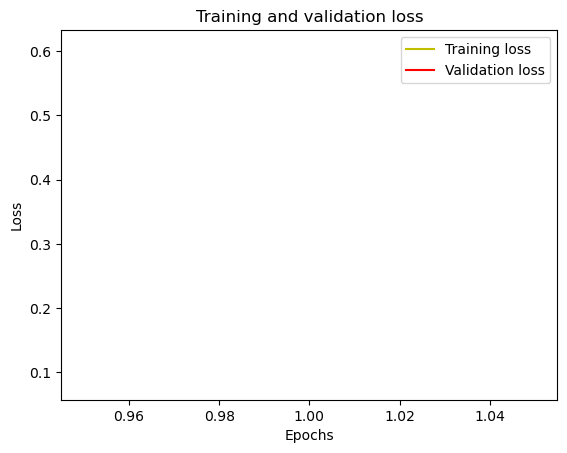

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

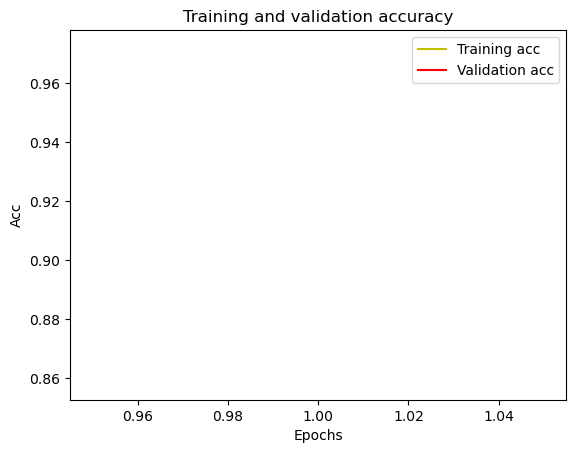

In [58]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [59]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

72/72 [==============================] - 6s 7ms/step


In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

72/72 [==============================] - 1s 7ms/step
Confusion Matrix
[[116   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 121   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0]
 [  0   0 125   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0 138   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   1   0   0 118   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 109   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0 133   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0 107   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0 109   0   0   0   0   0   0   0   0   0
    0]
 [  2   2   0   0   0   0   0   0   0  83   0   0   0   6  21   0   1   0
    0]
 [  0   0   0   0   0   0   0   0   0   0 131   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0  